In [2]:
import pandas as pd

In [3]:
app_with_dp=pd.read_csv('./apps.csv')
apps=app_with_dp.drop_duplicates()
apps.shape[0]
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
char_to_remove=['+',',','$']
col_to_clean=['Installs','Price']
for col in col_to_clean:
    for char in char_to_remove:
     apps[col]= apps[col] .apply(lambda x: x.replace(char,''))
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [5]:
apps['Installs']= apps['Installs'].astype('float')
apps['Price']= apps['Price'].astype('float')
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB
None


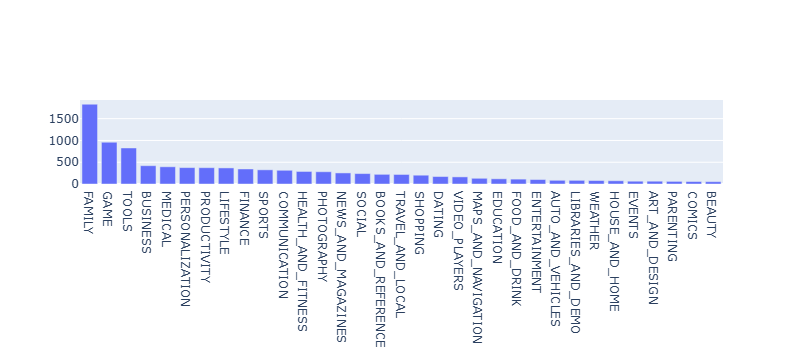

In [6]:
import numpy as np
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

uniqe_number_of_categeris=len(apps['Category'].unique())

uniqe_number_of_categeris=apps['Category'].value_counts()

sort_number_of_value_count=uniqe_number_of_categeris.sort_values(ascending= False)
data=[go.Bar(
  x=  uniqe_number_of_categeris.index,
   y= uniqe_number_of_categeris.values,
)]

plotly.offline.iplot(data)

Average app rating =  4.173243045387994


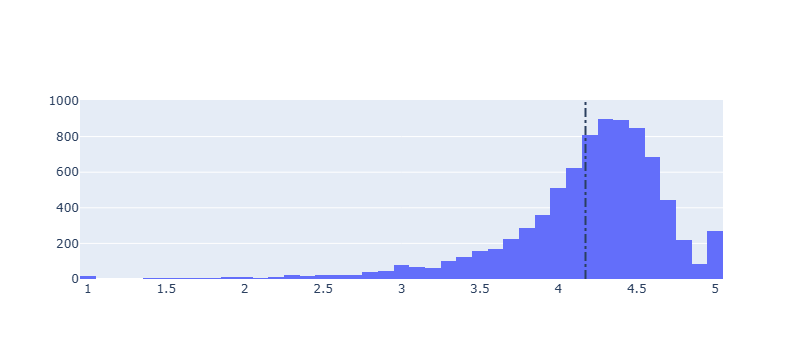

In [7]:
avg_app_rating = apps['Rating'].sum() / apps['Rating'].count() # apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)
data = [go.Histogram(
     x= apps['Rating']
)]
layout = {'shapes':
   [{
    'type':'line',
     'x0':avg_app_rating,
     'y0':0,
     'x1':avg_app_rating,
     'y1':1000,
     'line':{'dash':'dashdot'}
      }
   ]
}

plotly.offline.iplot({'data':data,'layout':layout}) 

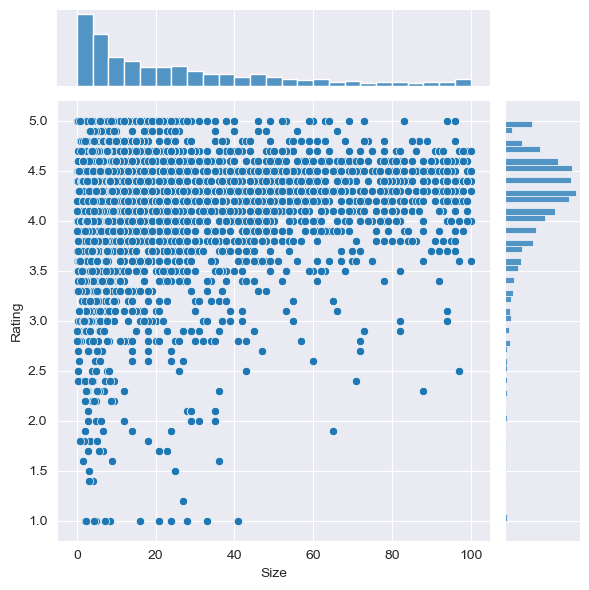

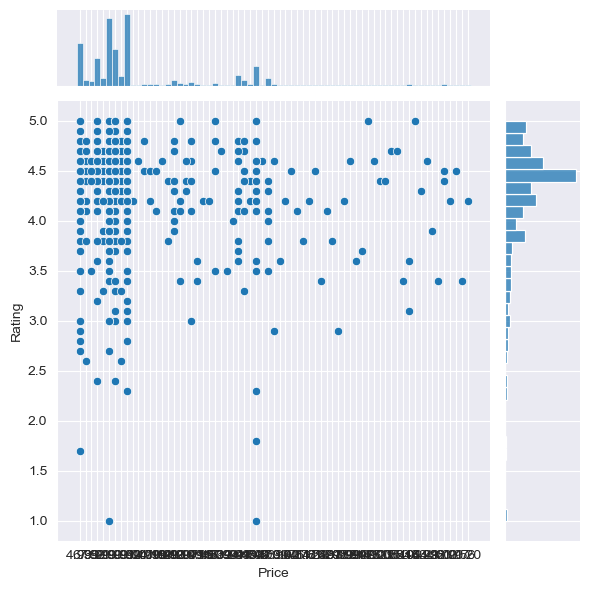

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

apps_with_size_and_rating_present = apps[
    apps['Rating'].notnull() & apps['Size'].notnull()
]

large_categories = apps_with_size_and_rating_present.groupby('Category')\
                    .filter(lambda x: len(x) >= 250)
plt1 = sns.jointplot(
    data=large_categories,
    x='Size',
    y='Rating'
)

paid_apps = apps_with_size_and_rating_present[
    apps_with_size_and_rating_present['Type'] == 'Paid'
]

plt2 = sns.jointplot(
    data=paid_apps,
    x='Price',
    y='Rating'
)
plt.show()

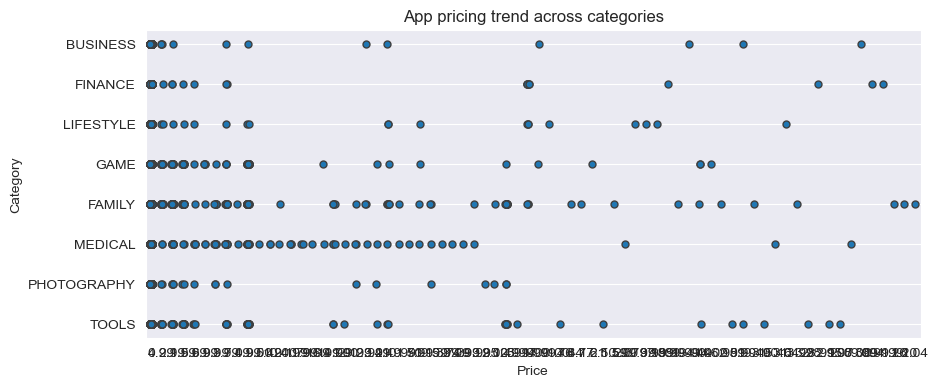

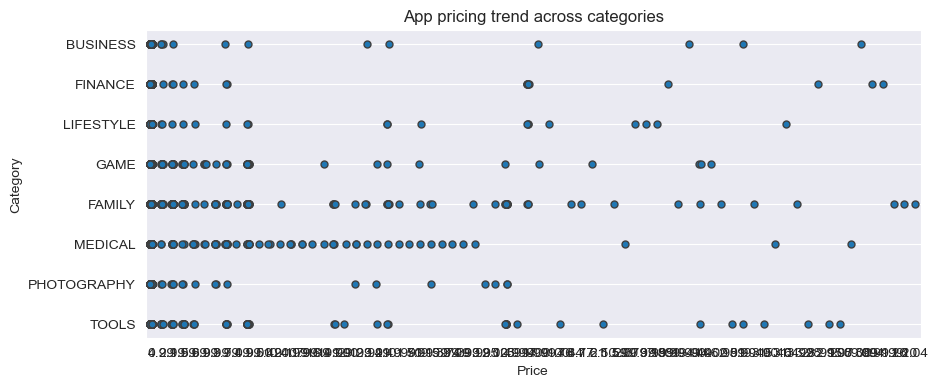

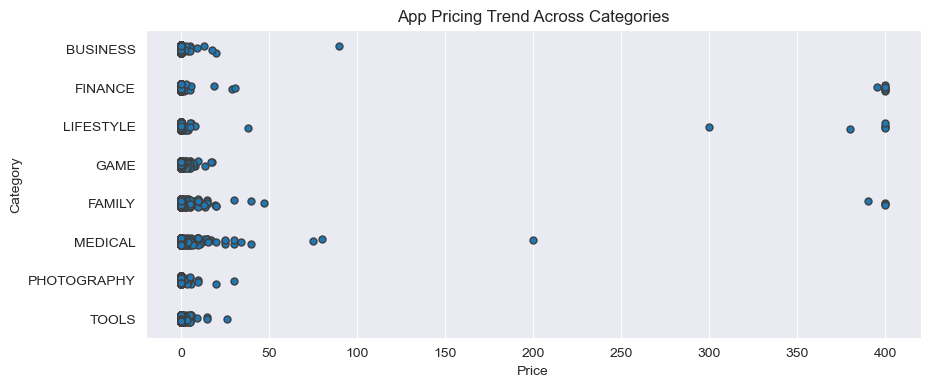

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)

popular_app_cats = apps[apps.Category.isin([
    'GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL',
    'TOOLS', 'FINANCE', 'LIFESTYLE','BUSINESS'
])]

ax = sns.stripplot(
    data=popular_app_cats,
    x='Price',
    y='Category',
    jitter=True,
    linewidth=1
)

ax.set_title('App Pricing Trend Across Categories')
plt.show()

apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]


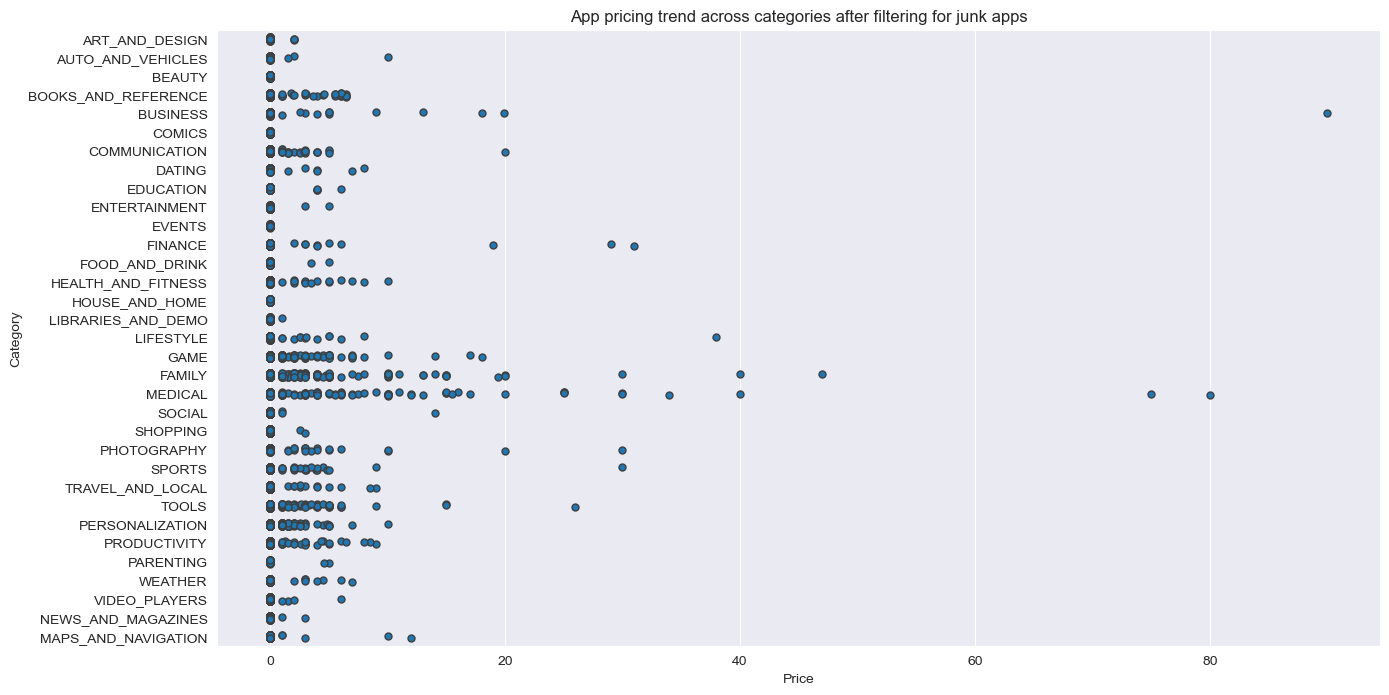

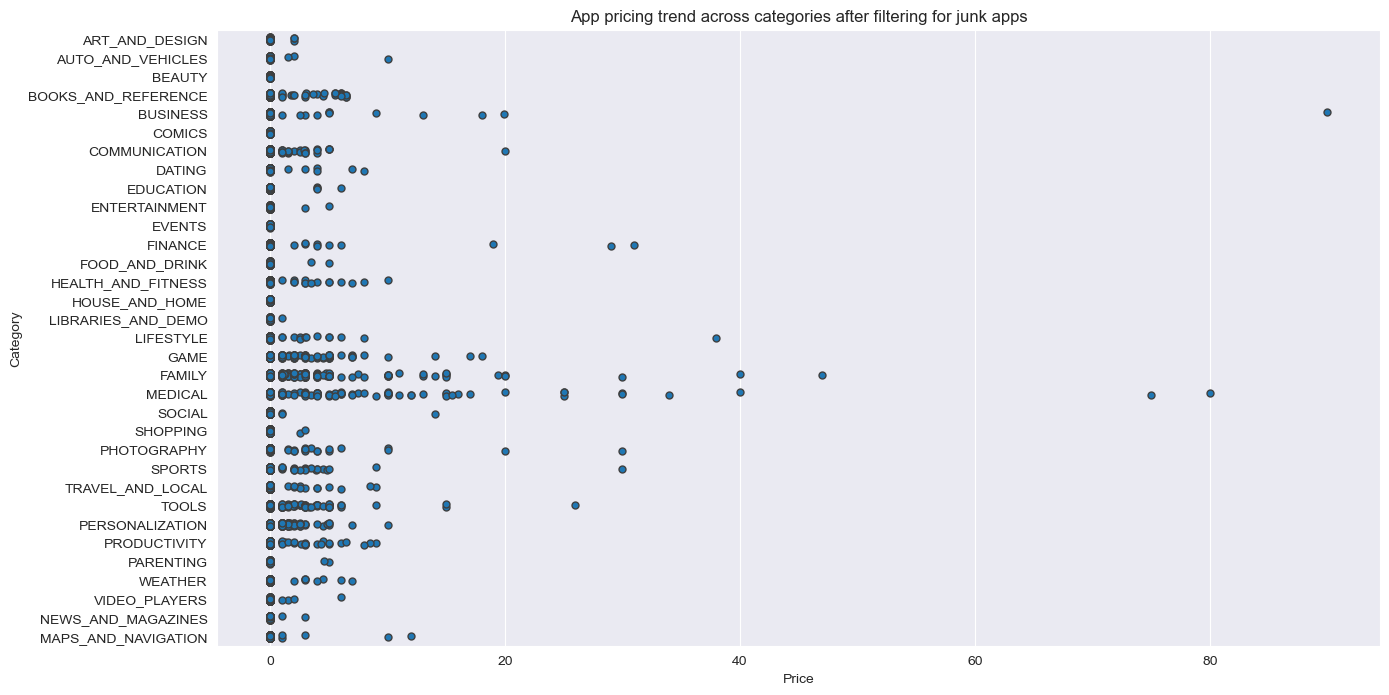

In [20]:
apps_under_100 = apps[apps['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')
plt.show()

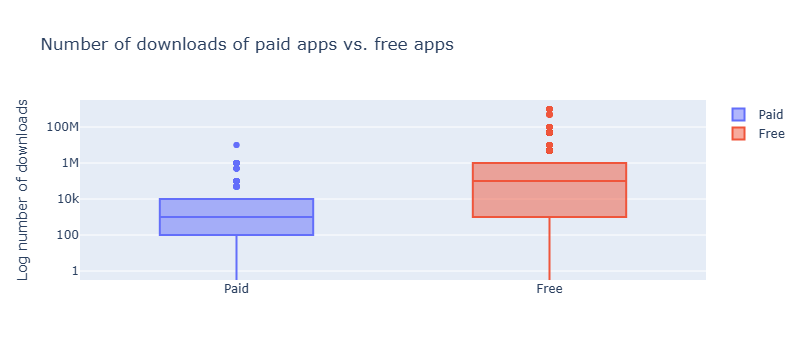

In [21]:
trace0 = go.Box(
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [4]:
!jupyter nbconvert --to pdf android app.ipynb



This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'android' matched no files
[NbConvertApp] WARNING | pattern 'app.ipynb' matched no files
